In [1]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dossier ="D:/MASTER/IA/dataset/"

In [2]:
sales = pd.read_csv(dossier+'Sales.csv')
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [3]:
sales.shape

(1000, 17)

1- Valeur  manquantes

In [17]:
sales.isnull().sum(axis=0)

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Revenue                    0
dtype: int64

Aucune valeure manquante

2- Branche avec le meilleur chiffre d'affaire

In [6]:
branch_revenue = sales.groupby('Branch')['Total'].sum()
best_branch = branch_revenue.idxmax()

best_branch

'C'

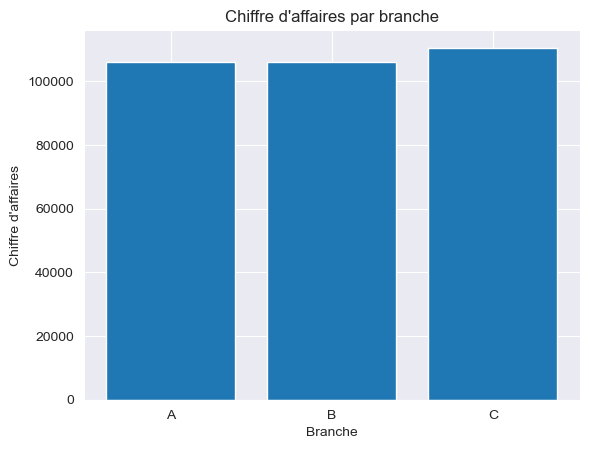

In [7]:

plt.bar(branch_revenue.index, branch_revenue.values)
plt.xlabel('Branche')
plt.ylabel('Chiffre d\'affaires')
plt.title('Chiffre d\'affaires par branche')

# Afficher le graphique
plt.show()

3 Les membre dépense-t-ils plus que les client normaux

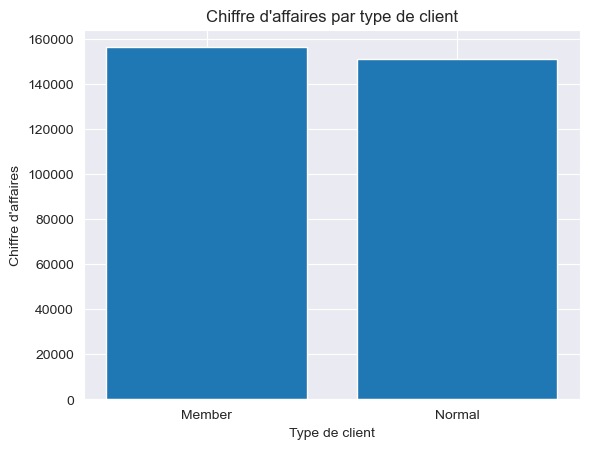

In [15]:
# Calculer le chiffre d'affaires pour chaque ligne
sales['Revenue'] = sales['Quantity'] * sales['Unit price']

# Calculer le chiffre d'affaires total par type de client
customer_revenue = sales.groupby('Customer type')['Revenue'].sum()

# Créer le graphique à barres
plt.bar(customer_revenue.index, customer_revenue.values)
plt.xlabel('Type de client')
plt.ylabel('Chiffre d\'affaires')
plt.title('Chiffre d\'affaires par type de client')

# Afficher le graphique
plt.show()

In [18]:
customer_revenue

Customer type
Member    156403.28
Normal    151184.10
Name: Revenue, dtype: float64

Les membres dépense plus que les clients ordinaire

4 La catégorie de produit le plus vendu

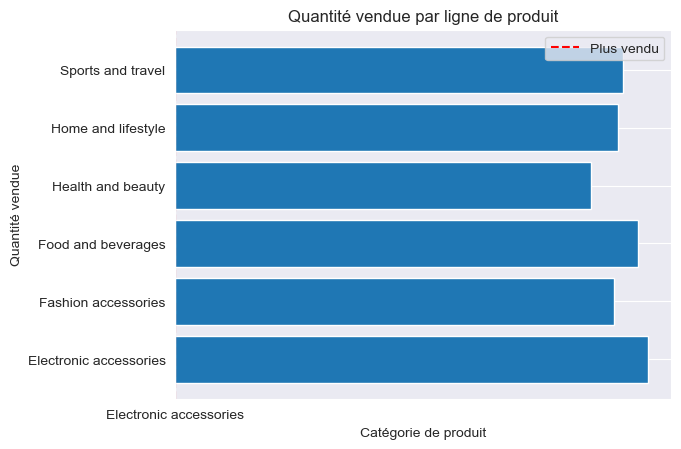

In [22]:
product_par_qt = sales.groupby('Product line')['Quantity'].sum()
le_plus_vendu = product_par_qt.idxmax()

# Créer le graphique à barres
plt.barh(product_par_qt.index, product_par_qt.values)
plt.xlabel('Catégorie de produit')
plt.ylabel('Quantité vendue')
plt.title('Quantité vendue par ligne de produit')

# Mettre en évidence la ligne de produit la plus vendue
plt.axvline(x=le_plus_vendu, color='red', linestyle='--', label='Plus vendu')

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.show()

La catégorie  de produit le plus vendu est :

In [21]:
le_plus_vendu

'Electronic accessories'

Le moyen de paiement le plus utilisé par les femme

In [31]:
payment_counts = sales[sales['Gender'] == 'Female']['Payment'].value_counts()
mode_paiement = payment_counts.idxmax()


In [32]:
mode_paiement

'Cash'

6 Comparaison des dépenses des client ***

In [36]:
low_rating_clients = sales[sales['Rating'] <= 5]
total_low_rating_clients = low_rating_clients['Total'].sum()


high_rating_clients = sales[sales['Rating'] > 5]
total_high_rating_clients = high_rating_clients['Total'].sum()


print("Dépense totale des clients avec la note <= 5:", total_low_rating_clients)
print("Dépense totale des clients avec la note > 5:", total_high_rating_clients)


Dépense totale des clients avec Rating <= 5: 60308.9865
Dépense totale des clients avec Rating > 5: 262657.76249999995
